<a href="https://colab.research.google.com/github/YoonSungLee/AI-Innovation-Square_Vision/blob/master/Day%201_%EC%BB%B4%ED%93%A8%ED%84%B0%20%EB%B9%84%EC%A0%84%EA%B3%BC%20%EB%94%A5%20%EB%9F%AC%EB%8B%9D/MNIST_Dense_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print train_images.shape, train_labels

11501568/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) [5 0 4 ... 5 6 8]


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
print len(train_labels), train_images.shape[0]
a, b, c = train_images.shape
print a, b, c

60000 60000
60000 28 28


In [6]:
train_labels[0]

5

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

5


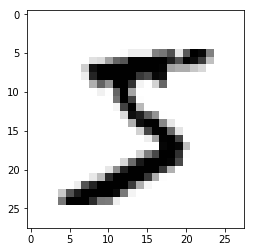

In [10]:
import matplotlib.pyplot as plt
digit = train_images[0]
print train_labels[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [11]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) # Dense : Fully Connected Layer
network.add(layers.Dense(10, activation='softmax')) # exponential : 클래스 간의 확률 간격을 키우는 효과

W0225 07:54:23.566019 140687553451904 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0225 07:54:23.576853 140687553451904 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0225 07:54:23.583240 140687553451904 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [12]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

W0225 07:54:27.305075 140687553451904 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0225 07:54:27.333273 140687553451904 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255 # '정규화'를 해줌으로써 weight의 변동 차를 줄여줄 수 있다.

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
from keras.utils import to_categorical # one-hot encoding

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
network.summary()

# Params = input * output + bias
# Dense 1 = 784 * 512 + 512 = 401920
# Dense 2 = 512 * 10 + 10 = 5130

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
# batch_size : 한 번에 train하는 data의 갯수
# batch_size 단위로 propagation -> backpropagation
# 여러 개의 loss값 생성 -> 평균을 구해 단 하나의 loss 도출
# 60000 = 128 * 468 + 96
# 96개는 따로 계산
# 새로 epoch이 시작될 때 train data를 shuffle

# Keras Tuner를 통해 최적의 batch_size 탐색 가능(Youtube : sentdex)

network.fit(train_images, train_labels, epochs=5, batch_size=128)

W0225 08:00:48.385225 140687553451904 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0225 08:00:48.445225 140687553451904 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0225 08:00:48.452491 140687553451904 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W0225 08:00:48.490113 140687553451904 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Se

Epoch 1/5


W0225 08:00:49.955420 140687553451904 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0225 08:00:49.956794 140687553451904 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W0225 08:00:50.054985 140687553451904 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



60000/60000 [==============================] - 11s 186us/step - loss: 0.2575 - acc: 0.9255
Epoch 2/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.1051 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.0682 - acc: 0.9793
Epoch 4/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.0505 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.0377 - acc: 0.9883


In [17]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 49us/step


In [0]:
prediction = network.predict(test_images)

In [19]:
import numpy as np
np.argmax(prediction[0])

7

In [20]:
print('test_acc:', test_acc)

('test_acc:', 0.9789)


인공지능 수학을 시각적으로 알려주는 유튜브
* 3Blue1Brown

Keras의 units수, batch_size 등 파라미터들의 최적값을 계산해주는 유튜브
* Keras Tuner(by sentdex)